In [44]:
from keras.datasets import mnist

In [45]:
# x는 이미지 y는 라벨
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


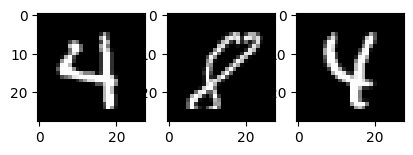

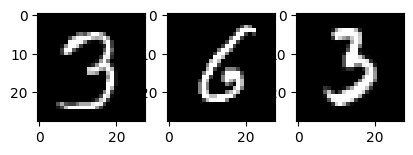

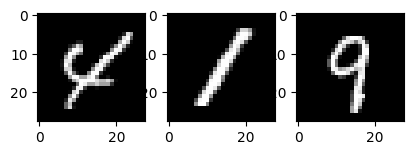

In [47]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1,4,1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0,60000)], cmap="gray")
    plt.show()

In [48]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [49]:
# One-hot Encoding
# 0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")

y_train_vec.shape:(60000, 10)


In [50]:
print(y_train[1])
print(y_train_vec[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
for x in x_train[2]:
    for i in x:
        print('{:3}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67232 39  0  0  0  0  0
  0  0  0  0 62 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0120180 39  0  0  0  0  0
  0  0  0  0126163  0  0  0  0  0  0  0  0  0  0  0  0  0  2153210 40  0  0  0  0  0
  0  0  0  0220163  0  0  0  0  0  0  0  0  0  0  0  0  0 27254162  0  0  0  0  0  0
  0  0  0  0222163  0  0  0  0  0  0  0  0  0  0  0  0  0183254125  0  0  0  0  0  0
  0  0  0 46245163  0  0  0  0  0  0  0  0  0  0  0  0  0198254 56  0  0  0  0  0  0
  0  0  0120254163  0  0  0  0  0  0  0  0  0  0  0  0 23231254 2

In [52]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]
# 만개
x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]
# 5만개
x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :]

In [53]:
rand_indices

array([48905, 49473,  7376, ...,  9133,  7339,  9563])

In [54]:
x_train_vec.shape

(50000, 28, 28, 1)

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) # kernel_size 쪼개는 사이즈 , 비선형에 좋은 성능 (relu)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax')) # softmax = 확률 분포로 나온다

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# 최적화 알고리즘 지정
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [84]:
#model 학습
history = model.fit(x_train_vec, y_train_vec, 
            batch_size=128, 
            epochs=100,
            validation_data=(x_valid_vec, y_valid_vec)
            )

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 3.7477e-07 - val_accuracy: 0.9843 - val_loss: 0.1826
Epoch 2/100
195/391 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.5883e-07

KeyboardInterrupt: 

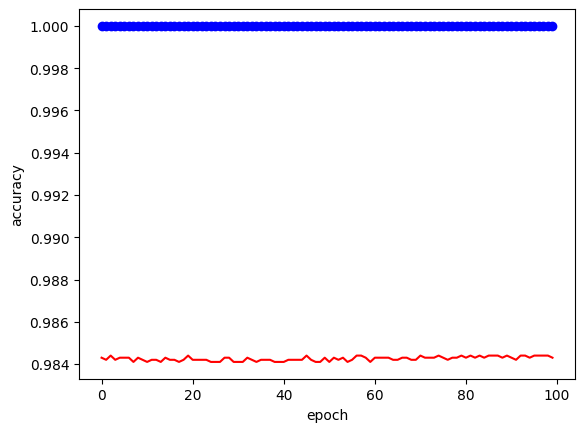

In [85]:
# 그래프가 둘 사이에서 멀지 않으면 좋은 그래프라 함.
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train acc')
plt.plot(epoch, valid_acc, 'red', label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [82]:
r = model.evaluate(x_test_vec, y_test_vec)

print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9806 - loss: 0.1907
Loss = 0.15118162333965302
Accuracy = 0.9840999841690063


In [83]:
model.save('mnist984.keras')